# Housing Prices

In [276]:
import pandas as pd
import seaborn as sns

## Get the data

In [218]:
raw_test_data = pd.read_csv('../data/raw/test.csv', index_col='Id')

Take an intial look at the data

In [219]:
raw_test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


We can see the data consists of 79 different features of int, float and object (likely string) type with 1459 different entries.

In [220]:
raw_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

Make a copy of the data for exploration.

In [221]:
df = raw_test_data.copy()

## Data exploration

#### Which features are in the dataset?

We can see there are 79 different features in the dataset which is a lot to work through. Taking a look at `data_description.txt` gives some insight into the meaning of each feature.

In [222]:
print('number of features:', len(df.columns))
df.columns.values.tolist()

number of features: 79


['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

#### Which are categorical?

We have a lot of features so we shall create a list of the categorical features incase it is useful later. We have 46 categorical features out of the 79 total features so more than half of the features are of categorical type.

In [223]:
categorical_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
                        'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
                        'Condition2','BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 
                        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
                        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
                        'CentralAir',  'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
                        'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
                        'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
len(categorical_features)

46

It may also be of use to split each categorical feature into nominal and ordinal, as well as seperating the special binary category case as they will need to be dealt with the different ways. We can see a pretty even split of nominal and ordinal features, with CentralAir being the only binary case.

In [224]:
nominal_categorical_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
                                'LotConfig', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 
                                'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                                'MasVnrType', 'Foundation',  'Heating', 'Electrical',    'GarageType',
                                'MiscFeature', 'SaleType', 'SaleCondition']

ordinal_categorical_features = ['Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual',
                                'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 
                                'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu',
                                'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','PoolQC', 'Fence']

binary_categorical_features = ['CentralAir']

#### Which are numerical?

Likewise with the categorical features there are a lot of numerical features so we shall also create a list of them. We can see there are 33 numerical features, slightly less than the categorical features.

In [225]:
numerical_features = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                      'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                      '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                      'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                      'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
                      'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                      'MiscVal', 'MoSold', 'YrSold']
len(numerical_features)

33

We can see we have mostly continuous numerical features with a fair amount of discrete data and some timeseries data we will have to deal with.

In [267]:
discrete_numerical_features = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                               'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                               'GarageCars', ]

continuous_numerical_features = ['LotFrontage', 'LotArea',  'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
                                 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
                                 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                                 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

timeseries_numerical_features = ['YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold', 'YrSold']

For completeness we shall make sure the number of features for each type match the number of features in the original dataframe.

In [227]:
# cjeck if categorical and numerical features are a complete list of the original features
all(df[categorical_features + numerical_features].columns.sort_values() == df.columns.sort_values())

True

In [228]:
# combine categorical feature lists and compare with categorical_features
com_cat_fts = nominal_categorical_features + ordinal_categorical_features + binary_categorical_features
# check if combined categorical feature types are a complete list of the categorical features
all(df[com_cat_fts].columns.sort_values() == df[categorical_features].columns.sort_values())

True

In [229]:
# combine numerical feature lists and compare with numerical_features
com_num_fts = discrete_numerical_features + continuous_numerical_features + timeseries_numerical_features
# check if combined numerical feature types are a complete list of the numerical features
all(df[com_num_fts].columns.sort_values() == df[numerical_features].columns.sort_values())

True

#### What are the datatypes of the data?

All of the nominal features are of string type.

In [230]:
df[nominal_categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1459 non-null   int64 
 1   MSZoning       1455 non-null   object
 2   Street         1459 non-null   object
 3   Alley          107 non-null    object
 4   LotShape       1459 non-null   object
 5   LandContour    1459 non-null   object
 6   LotConfig      1459 non-null   object
 7   Neighborhood   1459 non-null   object
 8   Condition1     1459 non-null   object
 9   Condition2     1459 non-null   object
 10  BldgType       1459 non-null   object
 11  HouseStyle     1459 non-null   object
 12  RoofStyle      1459 non-null   object
 13  RoofMatl       1459 non-null   object
 14  Exterior1st    1458 non-null   object
 15  Exterior2nd    1458 non-null   object
 16  MasVnrType     1443 non-null   object
 17  Foundation     1459 non-null   object
 18  Heating        1459 non-n

Most ordinal features are of string type but OverallQual and OverallCond are of integer type.

In [231]:
df[ordinal_categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Utilities     1457 non-null   object
 1   LandSlope     1459 non-null   object
 2   OverallQual   1459 non-null   int64 
 3   OverallCond   1459 non-null   int64 
 4   ExterQual     1459 non-null   object
 5   ExterCond     1459 non-null   object
 6   BsmtQual      1415 non-null   object
 7   BsmtCond      1414 non-null   object
 8   BsmtExposure  1415 non-null   object
 9   BsmtFinType1  1417 non-null   object
 10  BsmtFinType2  1417 non-null   object
 11  HeatingQC     1459 non-null   object
 12  KitchenQual   1458 non-null   object
 13  Functional    1457 non-null   object
 14  FireplaceQu   729 non-null    object
 15  GarageFinish  1381 non-null   object
 16  GarageQual    1381 non-null   object
 17  GarageCond    1381 non-null   object
 18  PavedDrive    1459 non-null   object
 19  Poo

The one binary feature is of string type, with values of 'Y' or 'N'.

In [232]:
print(df['CentralAir'].unique())
df[binary_categorical_features].info()

['Y' 'N']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CentralAir  1459 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB


Discrete numerical features are a mix of floating point and integer numbers.

In [233]:
df[discrete_numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtFullBath  1457 non-null   float64
 1   BsmtHalfBath  1457 non-null   float64
 2   FullBath      1459 non-null   int64  
 3   HalfBath      1459 non-null   int64  
 4   BedroomAbvGr  1459 non-null   int64  
 5   KitchenAbvGr  1459 non-null   int64  
 6   TotRmsAbvGrd  1459 non-null   int64  
 7   Fireplaces    1459 non-null   int64  
 8   GarageCars    1458 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 114.0 KB


The continuous numerical features are also a mix of floating point and integer numbers.

In [234]:
df[continuous_numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1232 non-null   float64
 1   LotArea        1459 non-null   int64  
 2   MasVnrArea     1444 non-null   float64
 3   BsmtFinSF1     1458 non-null   float64
 4   BsmtFinSF2     1458 non-null   float64
 5   BsmtUnfSF      1458 non-null   float64
 6   TotalBsmtSF    1458 non-null   float64
 7   1stFlrSF       1459 non-null   int64  
 8   2ndFlrSF       1459 non-null   int64  
 9   LowQualFinSF   1459 non-null   int64  
 10  GrLivArea      1459 non-null   int64  
 11  GarageArea     1458 non-null   float64
 12  WoodDeckSF     1459 non-null   int64  
 13  OpenPorchSF    1459 non-null   int64  
 14  EnclosedPorch  1459 non-null   int64  
 15  3SsnPorch      1459 non-null   int64  
 16  ScreenPorch    1459 non-null   int64  
 17  PoolArea       1459 non-null   int64  
 18  MiscV

All timeseries features are of integer type, apart from GargaeYrBlt which is a float.

In [235]:
df[timeseries_numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearBuilt     1459 non-null   int64  
 1   YearRemodAdd  1459 non-null   int64  
 2   GarageYrBlt   1381 non-null   float64
 3   MoSold        1459 non-null   int64  
 4   YrSold        1459 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 68.4 KB


#### Which columns could contain multiple features?

Looking at the unique values for the categorical features the data seems to be very clean. Each entry has a single category and can map to a category in `data_description.txt`. As for the numerical categories, as they are all int of float type they must only contain one value.

In [236]:
for col in df[categorical_features]:
    print(col, (df[col].unique()), '\n')

MSSubClass [ 20  60 120 160  80  30  50  90  85 190  45  70  75 180  40 150] 

MSZoning ['RH' 'RL' 'RM' 'FV' 'C (all)' nan] 

Street ['Pave' 'Grvl'] 

Alley [nan 'Pave' 'Grvl'] 

LotShape ['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour ['Lvl' 'HLS' 'Bnk' 'Low'] 

Utilities ['AllPub' nan] 

LotConfig ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3'] 

LandSlope ['Gtl' 'Mod' 'Sev'] 

Neighborhood ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker'] 

Condition1 ['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery' 'RRNn' 'PosA' 'RRAn' 'RRAe'] 

Condition2 ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery'] 

BldgType ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon'] 

HouseStyle ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf'] 

OverallQual [ 5  6  8  7  4  9  2  3 10  1] 

OverallCond [6 5 7 8 2 9 3 4 1] 

RoofStyle ['Gable' 'Hip' 

#### Which features may contain errors?

From the unique values above we can see that the categorical features are free of errors and typos apart from some values being slightly different to that listed in `data_description.txt`, such as the `MSZoning` feature having values of `c (all)` instead of `c` - but as there are only instances of `c (all)` and no instances of `c` this does not matter.

Numerical data is all of int or float type so errors of this kind cannot occur but we shall look for outliers in the data.

#### Which features contain outliers?

Looking at the decrete values they seem to have some outliers which we need to make sure we account for in modelling, but no exceedingly large ones which will need to be removed.

In [237]:
df[discrete_numerical_features].describe()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars
count,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1458.000000
mean,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1.766118
std,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,0.775945
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1.000000
50%,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,2.000000
75%,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2.000000
max,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,5.000000


<AxesSubplot:>

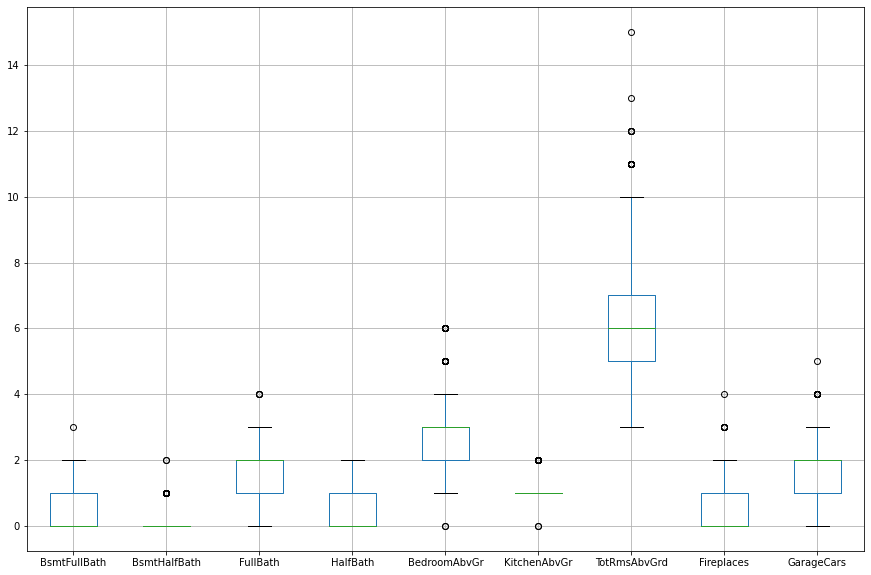

In [238]:
df[discrete_numerical_features].boxplot(figsize=(15,10))

We can see a lot of outliers in the LotArea. This is likely due to the  right-skew of this data - houses only get so small and so most houses will be in a similar range but a large house could have massive amounts of land (farms, estates etc.) and so the right side will trail massively. We will need to account for this skew but these do not seem like errors.

We see similar outliers with the MiscVal feature, this is likely due to any features of a house labelled as miscellaneous will be rare and so any non-null values for this feature will be outliers. We shall keep the outliers but ensure we account for them later on.

In [239]:
df[continuous_numerical_features].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1232.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,68.580357,9819.161069,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923
std,22.376841,4955.517327,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978
min,21.000000,1470.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,7391.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,67.000000,9399.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11517.500000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,200.000000,56600.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000


<AxesSubplot:>

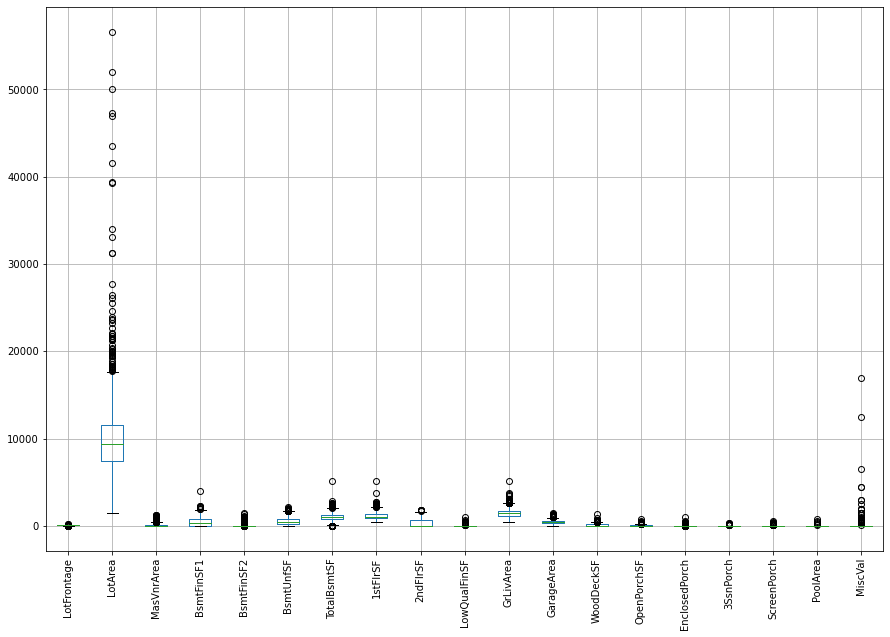

In [241]:
df[continuous_numerical_features].boxplot(figsize=(15,10), rot=90)

It is hard to see the other boxplots so we shall remove the above features to get a better view of the remaining conintuous data.

Looking at the remaining features we see a similar skew to the LotArea feature, with a right-handed trail due to a few larger houses having a large number of bedrooms, kitchens etc. and smaller houses still having 0,1,2...

Interestingly 0 values for LotFrontage and TotalBsmtSF appear as outliers, but these will just be due to properties having a door directly on the street or not having a basement, although it is suprising that most houses have a basement and not many have no front garden?

<AxesSubplot:>

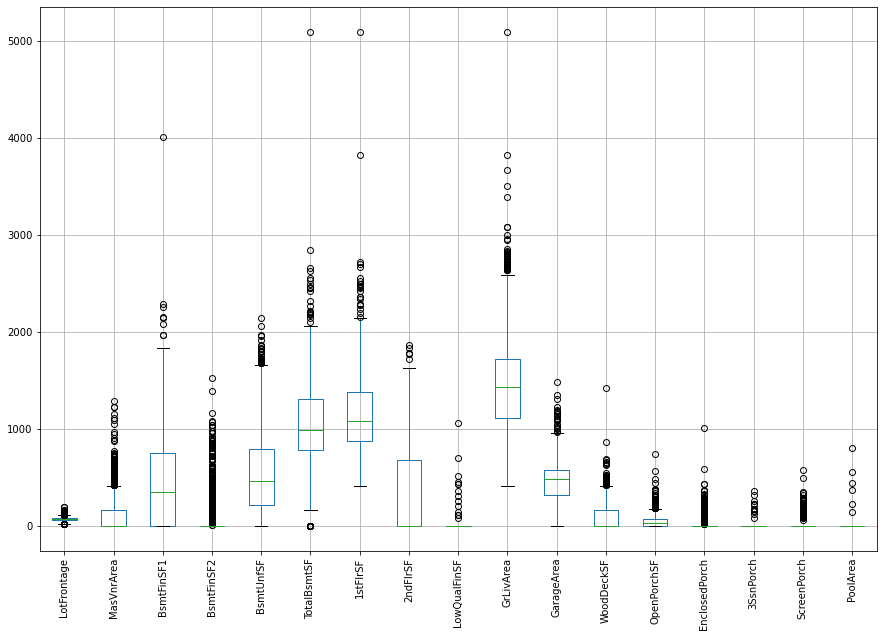

In [277]:
less_cont_features = continuous_numerical_features.copy()
less_cont_features.remove('LotArea')
less_cont_features.remove('MiscVal')
df[less_cont_features].boxplot(figsize=(15,10), rot=90)

For the timeseries data it makes we see a max value for GarageYrBuilt of 2207 - impossible in the year 2020, so this error must be corrected. It may make sense to replace this value with 2007 as it is probably a typo.

From here it makes sense to view the boxplots for months and years seperately.

In [184]:
df[timeseries_numerical_features].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
count,1459.000000,1459.000000,1381.000000,1459.000000,1459.000000
mean,1971.357779,1983.662783,1977.721217,6.104181,2007.769705
std,30.390071,21.130467,26.431175,2.722432,1.301740
min,1879.000000,1950.000000,1895.000000,1.000000,2006.000000
25%,1953.000000,1963.000000,1959.000000,4.000000,2007.000000
50%,1973.000000,1992.000000,1979.000000,6.000000,2008.000000
75%,2001.000000,2004.000000,2002.000000,8.000000,2009.000000
max,2010.000000,2010.000000,2207.000000,12.000000,2010.000000


We can see the timeseries data is relatively free of outliers, with YearBuilt having a large left-skew and some outlying data points due to a small number of old houses which is as expected.

<AxesSubplot:>

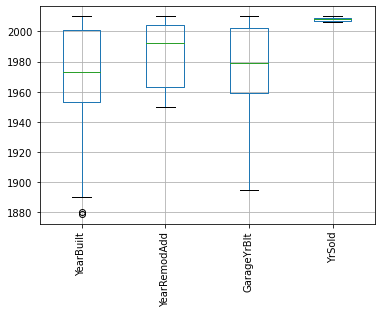

In [298]:
years_features = timeseries_numerical_features.copy()
years_features.remove('MoSold')

# don't include house sold in 2207 in plot
years_valid_df = df[years_features].copy()
years_valid_yf = yf.loc[yf['GarageYrBlt']!=2207]

years_valid_yf.boxplot(rot=90)

For the month sold feature we can see that most houses were sold around summer time with no outliers (as to be expected when all month values fall between 1 and 12).

<AxesSubplot:>

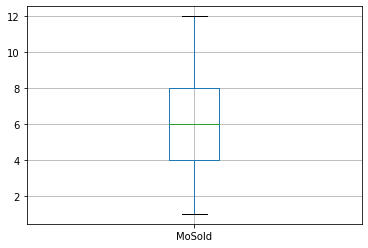

In [275]:
df.boxplot('MoSold')